<a href="https://colab.research.google.com/github/gabrielleclav/brain-tumor-detection/blob/main/code/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Necessary Library Imports 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os

#Tensorflow imports
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator

#To test and train dataset for modeling
from sklearn.model_selection import train_test_split

#Import dataset from google drive 
from google.colab import drive

In [17]:
# Defining a Function to load in the two datasets -- yes and no datasets 
def load_datasets(file_path):
  '''
  This function takes in a file path to the image datasets and reads in the files 
  using os library and load_img from keras. The function checks to see if it can 
  read in the image and executes if possible. If not, that file is ignored. 
  It sizes the image into the target image and append it to the data_array. 
  input: file path to dataset
  output: data array of all the files 
  '''

  data_array = []
  for file in os.listdir(file_path):
    try:
      if file == '.ipynb_checkpoints':
        continue #ignore this file
      
      loading = load_img(file_path + file, target_size = (200, 200))
      arr = img_to_array(loading) / 255
      data_array.append(arr)
    except:
      print(f'Error for file: {file}')
      
  return data_array      

def plot_acc(hist, num_epochs):
  '''
  Plotting the results from the CNN: the training accuracy and the testing 
  accuracy. 
  input: hist which are the results from the CNN
  output: plotted training vs. testing accuracy graph 
  '''

  plt.plot(hist.history['accuracy'], label='training accuracy', c='blue')
  plt.plot(hist.history['val_accuracy'], label='testing accuracy', c='orange')
  plt.title('Training Accuracy vs Testing Accuracy')
  plt.xticks(
            ticks= list(range(0,num_epochs)),
            labels=list(range(1, num_epochs + 1))
)
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['Training', 'Testing'], loc='upper right')
  plt.show()

def cnn_basic(filt=64, kern_size = (4,4), pool_s = (3,3), dense_filt=64):
  '''
  This function is taking parameters to build a CNN model, builds the model,
  and returns the model. 
  '''
  model = Sequential()

  #conv + pooling 
  model.add(Conv2D(filters=filt,
                   kernel_size= kern_size,
                   activation='relu',
                   input_shape=(X_train[0].shape)
                   ))
  model.add(MaxPooling2D(pool_size= pool_s))

  #adding another conv and pooling 
  model.add(Conv2D(filters=64, kernel_size=kern_size, activation='relu'))
  model.add(MaxPooling2D(pool_size=pool_s))

  #flatten and dense
  model.add(Flatten())
  model.add(Dense(dense_filt, activation='relu'))

  #Output layer
  model.add(Dense(1, activation='sigmoid'))

  #compile the model
  model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
  return model 

def fit_model(mod, ep = 10, batch = 32):
  '''
  This function takes the model, epochs, batch size and fits the model. 
  It then returns the history from the model fit. 
  '''

  history = mod.fit(X_train, y_train, validation_data=(X_test, y_test),
                   batch_size=32,
                   epochs=10)
  return history 
      

In [4]:
# For reproducibility
np.random.seed(42)

### Reading in the Images

In [5]:
#looking at the directories for the brain tumor datasets
!ls drive/MyDrive/datasets/brain_tumor_dataset/yes/

Y100.JPG  Y12.jpg   Y166.JPG  Y195.JPG	Y254.jpg  Y38.jpg  Y59.JPG  Y82.jpg
Y101.jpg  Y13.jpg   Y167.JPG  Y19.JPG	Y255.JPG  Y39.jpg  Y60.jpg  Y85.JPG
Y102.jpg  Y146.JPG  Y168.jpg  Y1.jpg	Y256.JPG  Y3.jpg   Y61.jpg  Y86.JPG
Y103.jpg  Y147.JPG  Y169.jpg  Y20.jpg	Y257.jpg  Y40.JPG  Y62.jpg  Y89.JPG
Y104.jpg  Y148.JPG  Y16.JPG   Y21.jpg	Y258.JPG  Y41.jpg  Y65.JPG  Y8.jpg
Y105.jpg  Y14.jpg   Y170.JPG  Y22.jpg	Y259.JPG  Y42.jpg  Y66.JPG  Y90.jpg
Y106.jpg  Y153.jpg  Y17.jpg   Y23.JPG	Y25.jpg   Y44.JPG  Y67.JPG  Y91.jpg
Y107.jpg  Y154.jpg  Y180.jpg  Y242.JPG	Y26.jpg   Y45.JPG  Y69.jpg  Y92.jpg
Y108.jpg  Y155.JPG  Y181.jpg  Y243.JPG	Y27.jpg   Y46.jpg  Y6.jpg   Y92.png
Y109.JPG  Y156.JPG  Y182.JPG  Y244.JPG	Y28.jpg   Y47.JPG  Y70.jpg  Y95.jpg
Y10.jpg   Y157.JPG  Y183.jpg  Y245.jpg	Y29.jpg   Y49.JPG  Y71.JPG  Y96.jpg
Y111.JPG  Y158.JPG  Y184.JPG  Y246.JPG	Y2.jpg	  Y4.jpg   Y73.jpg  Y97.JPG
Y112.JPG  Y159.JPG  Y185.jpg  Y247.JPG	Y30.jpg   Y50.JPG  Y74.jpg  Y98.JPG
Y113.JPG  Y15.jpg   Y186.jpg  Y248

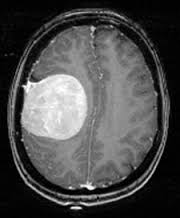

In [6]:
#Checking to see how load_img works!
img = load_img('drive/MyDrive/datasets/brain_tumor_dataset/yes/Y1.jpg')
img

In [7]:
yes_path = 'drive/MyDrive/datasets/brain_tumor_dataset/yes/'
no_path = 'drive/MyDrive/datasets/brain_tumor_dataset/no/'

In [8]:
yes_arrays = load_datasets(yes_path)
len(yes_arrays)

155

In [10]:
no_arrays = load_datasets(no_path)
len(no_arrays)

98

### Making X and y Variables 

In [11]:
#X should contain both yes and no 
X = yes_arrays + no_arrays
X_array = np.array(X)
X_array.shape
#y containing yes = 1 and no = 0 
y = [1] * 155 + [0] * 98
y_array = np.array(y)
y_array.shape

(253,)

### Train-testing Splitting

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, random_state=123, stratify=y_array)
#Checking the shapes of each variables from the splitting:
X_train.shape, X_train[0].shape

((189, 200, 200, 3), (200, 200, 3))

In [13]:
X_test.shape, X_test[0].shape

((64, 200, 200, 3), (200, 200, 3))

In [14]:
y_train.shape, y_test.shape

((189,), (64,))

### CNN: Convolutional Neural Networks

In [15]:
#Using the default parameters from the function so 
#filters=64, kernel_size=(4,4), pool_size=(3,3), denser filter = 64
mod_1 = cnn_basic()

In [18]:
history_1 = fit_model(mod_1) #using default epoch and batch size 

Epoch 1/10
6/6 [==============================] - 15s 2s/step - loss: 1.2843 - accuracy: 0.4762 - val_loss: 0.6852 - val_accuracy: 0.5781
Epoch 2/10
6/6 [==============================] - 14s 2s/step - loss: 0.6089 - accuracy: 0.7460 - val_loss: 0.6303 - val_accuracy: 0.6719
Epoch 3/10
6/6 [==============================] - 13s 2s/step - loss: 0.5012 - accuracy: 0.7937 - val_loss: 0.7089 - val_accuracy: 0.6406
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 0.4894 - accuracy: 0.7937 - val_loss: 0.5767 - val_accuracy: 0.7344
Epoch 5/10
6/6 [==============================] - 13s 2s/step - loss: 0.4459 - accuracy: 0.8095 - val_loss: 0.5528 - val_accuracy: 0.7344
Epoch 6/10
6/6 [==============================] - 13s 2s/step - loss: 0.4174 - accuracy: 0.8254 - val_loss: 0.5395 - val_accuracy: 0.7500
Epoch 7/10
6/6 [==============================] - 13s 2s/step - loss: 0.3739 - accuracy: 0.8413 - val_loss: 0.5771 - val_accuracy: 0.8281
Epoch 8/10
6/6 [==================

In [19]:
mod_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 197, 197, 64)      3136      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 65, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        65600     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 64)                1

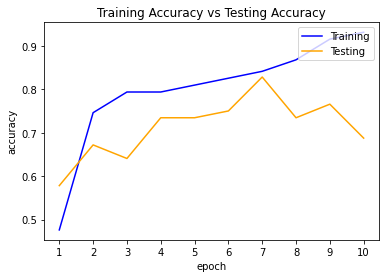

In [20]:
plot_acc(history_1, 10)